# PROJET INGE 2 : 
# Computer Vision pour la lecture automatique de factures
### Encadrant : Wajd MESKINI
### Etudiant : Bapiste Behr, Thomas Kusnierek, Benjamin Szurek

# PARTIE 1

-	Question 1 : Sur le github, prendre connaissance du fichier requirements.txt. Comment ferez-vous pour installer toutes ces librairies en une seule ligne avec pip en partant du requirements.txt ?
Avec la commande « pip install -r requirements.txt », toutes les librairies dans requirements.txt devraient s’intaller.

-	Question 2 : Prendre connaissance des librairies installées. A quoi pourraient-elles servir ?
Les librairies sont les suivantes : 
•	numpy : permet d’effectuer des calculs numériques, notamment matriciels avec Python. (exemple : addition et multiplication de matrice)
•	pandas : permet d’analyser et manipuler les données plus facilement. (filtrage et tri de dataframe)
•	scikit-image : permet le traitement d’image (importation et affichage d’image)
•	opencv : permet le traitement d’image centrées sur la vision d’ordinateur (CV) en temps réel. (reconnaissance de formes, manipulation de l’image)
•	pillow (ou PIL : Python Imaging Library): permet le traitement d’image dans ce qui est l’ouverture et manipulation d’une liste étendue de formats d’images.
•	pytesseract : permet le traitement de texte imprimé ou écrit des images.



# PARTIE 2

nodemon --exec "python -v" ./app.py

### 2.1


(np.float64(-0.5), np.float64(599.5), np.float64(799.5), np.float64(-0.5))

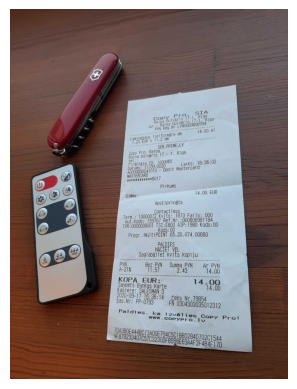

In [1]:
# pytesseract.pytesseract.tesseract_cmd = r "C:\ Program␣ F i l e s \ Tesseract−OCR \ t e s s e r a c t . exe "
# "C:\Program Files\Tesseract-OCR\tesseract.exe" 


### Préliminaire ###
pathSample="./sample.jpg"
from PIL import Image,ImageFilter

picturePillow = Image.open(pathSample)
picturePillow.show()

new_picture = picturePillow.filter(ImageFilter.BLUR)
# new_picture.save("./receipt-ocr-project/sample_blur.jpg",quality=95)
# new_picture.show()
# new_picture.close()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pictureMatplot = mpimg.imread(pathSample)
plt.imshow(pictureMatplot)
plt.axis("off")
# plt.show() # affichage dans une fenêtre


2.2

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from PIL import Image

import pytesseract

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

from imgutils import *

In [3]:
image=cv2.imread("sample.jpg")
cv2.imshow("Image",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
# Réduction de la taille de l'image de base
smallImage=opencv_resize(image,500/image.shape[0]) 
cv2.imshow("Image reduite",smallImage)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [5]:
# Affiche de l'image en niveau de gris 
imagegris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Image grise", imagegris)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [6]:
image_gris_reduite=cv2.cvtColor(smallImage,cv2.COLOR_BGR2GRAY)
cv2.imshow("Image grise reduite", image_gris_reduite)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
image_floue=cv2.GaussianBlur(image,(13,13),0)
cv2.imshow("Image Floue",image_floue)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [8]:
image_grise_floue_reduite=cv2.GaussianBlur(image_gris_reduite,(3,3),0)
cv2.imshow("Image grise Floue réduite",image_grise_floue_reduite)
cv2.waitKey(0)
cv2.destroyAllWindows()


sûrement une erreur dans le code juste en dessous pour l'image dilatée, le reste au-dessus semble bon

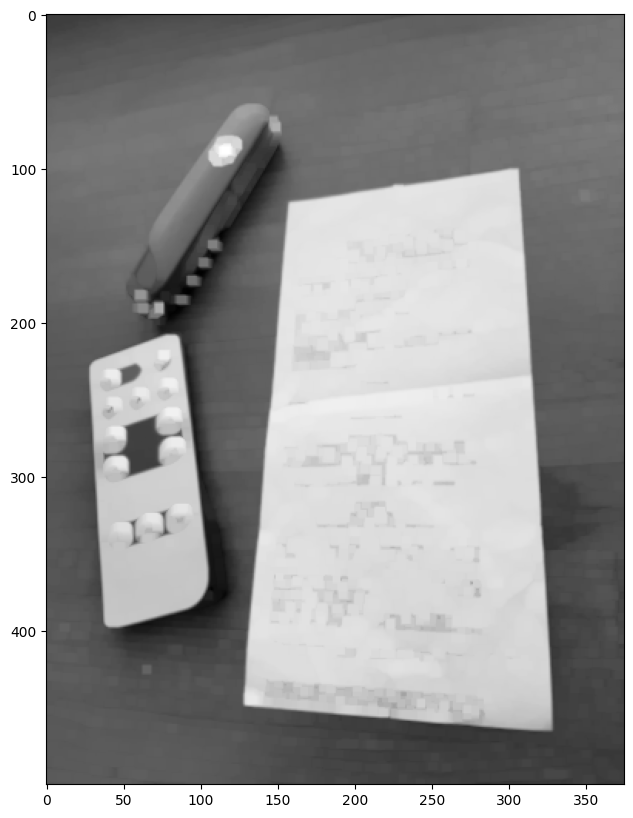

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
image_dilatee = cv2.dilate(image_grise_floue_reduite, kernel)
plot_gray(image_dilatee)
cv2.imshow("Image dilatee",image_dilatee)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
# finds edges in the input image and marks them in the output map edges
# On le fait uniquement pour l'image de base
edges_base = cv2.Canny(image,100,100,apertureSize=3)
cv2.imshow('Edges',edges_base)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# finds edges in the input image and marks them in the output map edges
# On le fait sur l'image qui a été modifié au fur et à mesure du code 
edges_tout = cv2.Canny(image_dilatee,100,100,apertureSize=3)
cv2.imshow('Edges',edges_tout)
cv2.waitKey(0)
cv2.destroyAllWindows()

2.3

Extraction des contours de l'image (changeme)

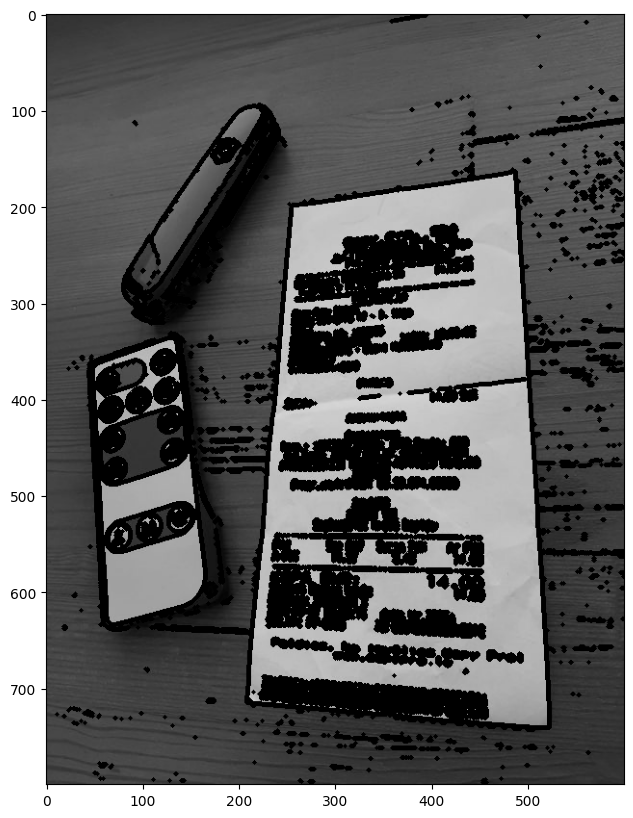

In [12]:
# Find contours
contours, hierarchy = cv2.findContours(edges_base, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
cv2.drawContours(imagegris, contours, -1, (0, 255, 0), 3)

plot_rgb(imagegris)
# Display the result
# cv2.imshow('Contours', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

[[[453 798]]

 [[457 798]]]


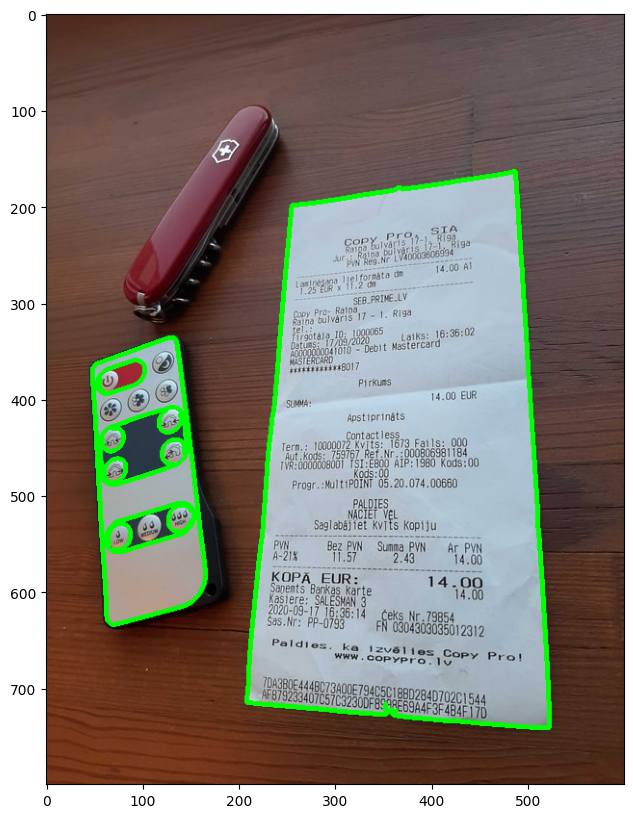

In [13]:

# Tri des contours par superficie décroissante
contours_trie = sorted(contours, key=cv2.contourArea, reverse=True)
print(contours[0][:5])
# Dessiner les 10 plus grands contours sur une copie de l'image originale
image_top10_contours = image.copy()
cv2.drawContours(image_top10_contours, contours_trie[:10], -1, (0, 255, 0), 3)

# Affichage de l'image avec les 10 plus grands contours
plot_rgb(image_top10_contours)


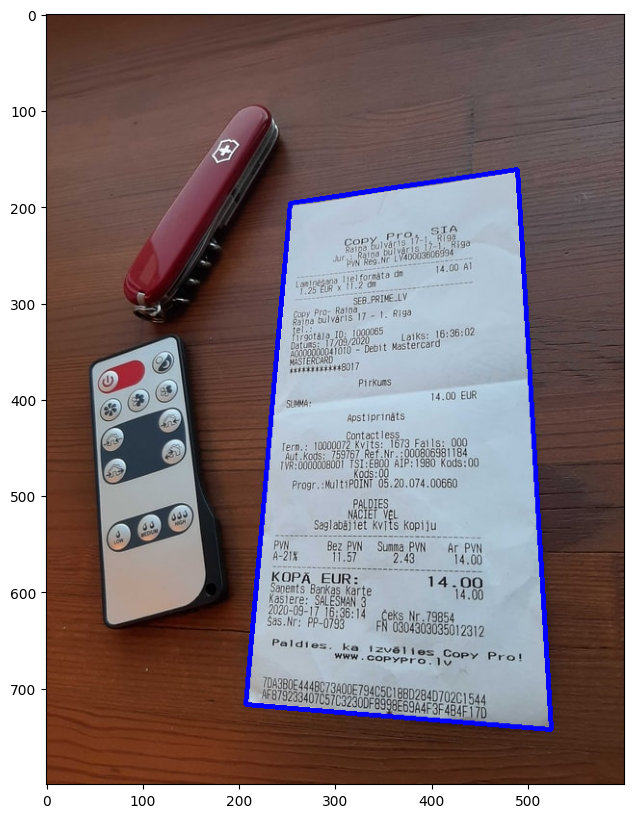

In [14]:
image=cv2.imread("sample.jpg")
imagegris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
image_dilatee = cv2.dilate(imagegris, kernel)

edges_base = cv2.Canny(image_dilatee,100,100,apertureSize=3)
contours, hierarchy = cv2.findContours(edges_base, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_trie = sorted(contours, key=cv2.contourArea, reverse=True)
contour_Rect=get_receipt_contour(contours_trie[:10])
if contour_Rect is not None:
    image_Rect=image.copy()
    cv2.drawContours(image_Rect,[contour_Rect],-1,(255,0,0),3)
    plot_rgb(image_Rect)
else:
    print("No contour detected")

2.4


In [15]:
import cv2
import numpy as np
from imgutils import *


image = cv2.imread("sample.jpg")
imagegris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_flou = cv2.GaussianBlur(imagegris, (5, 5), 0)
edges = cv2.Canny(image_flou, 75, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours_trie = sorted(contours, key=cv2.contourArea, reverse=True)
contour_Rect = get_receipt_contour(contours_trie[:10])


if contour_Rect is not None:
    rect=contour_to_rect(contour_Rect)
    image_warped=wrap_perspective(image,rect)
    image_bw_scanner=bw_scanner(image_warped)
    
    cv2.imshow("Image traitée noir-blanc", image_bw_scanner)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Aucun contour détecté")


# Partie 3

In [22]:
import cv2
import numpy as np
import pytesseract
import re




# Assurez-vous de mettre le bon chemin vers Tesseract-OCR
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Chargement et traitement de l'image
image = cv2.imread(r".\sample.jpg")   #(r"data\data\1132-receipt.jpg")
imagegris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_flou = cv2.GaussianBlur(imagegris, (5, 5), 0)
edges = cv2.Canny(image_flou, 75, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours_trie = sorted(contours, key=cv2.contourArea, reverse=True)
contour_Rect = get_receipt_contour(contours_trie[:10])


if contour_Rect is not None:
    rect=contour_to_rect(contour_Rect)
    image_warped=wrap_perspective(image,rect)
    image_bw_scanner=bw_scanner(image_warped)
    
    cv2.imshow("Image traitée noir-blanc", image_bw_scanner)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Aucun contour détecté")



# Pour image qui a déjà été traité
if len(image_bw_scanner.shape) == 2:  # Si l'image est en niveaux de gris
        image_bw_scanner = cv2.cvtColor(image_bw_scanner, cv2.COLOR_GRAY2BGR)
h, w,_= image_bw_scanner.shape
        
data = pytesseract.image_to_data(image_bw_scanner, output_type=pytesseract.Output.DICT, lang="eng")

maxi = 0
pattern_regex = re.compile(r'\d{1,3}(?:[.,]\d{2})')  # Recherche de chiffres type "12.34" ou "1,234.56"
for i in range(len(data["text"])):
    text = data["text"][i]
    x, y, w, h = data["left"][i], data["top"][i], data["width"][i], data["height"][i]

    if text.strip():
           
        montant_match = pattern_regex.search(text)
        if montant_match:
            cv2.rectangle(image_bw_scanner, (x, y), (x + w, y + h), (0, 255, 0), 2)
            montant = float(montant_match.group().replace(",", "."))
            maxi = max(maxi, montant)

 # Appliquer OCR sur l'image traitée
montant_total1, image_avec_rectangles = maxi,image_bw_scanner 

# Affichage
cv2.imshow("Image avec texte détecté", image_avec_rectangles)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Affichage du montant total détecté
print(f"Montant total image traitée détecté : {montant_total1} €")















# Image d'origine
h, w, _ = image.shape
data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT, lang="eng")

maxi = 0
pattern_regex = re.compile(r'\d{1,3}(?:[.,]\d{2})')  # Recherche de chiffres type "12.34" ou "1,234.56"

for i in range(len(data["text"])):
    text = data["text"][i]
    x, y, w, h = data["left"][i], data["top"][i], data["width"][i], data["height"][i]

    if text.strip():
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        montant_match = pattern_regex.search(text)
        if montant_match:
            montant = float(montant_match.group().replace(",", "."))
            maxi = max(maxi, montant)

# Appliquer OCR sur l'image traitée
montant_total, image_avec_rectangles = maxi,image 
# Affichage
cv2.imshow("Image avec texte détecté", image_avec_rectangles)
cv2.waitKey(0)
cv2.destroyAllWindows()




# Affichage du montant total détecté
print(f"Montant total détecté : {montant_total} €")


Montant total image traitée détecté : 20.07 €
Montant total détecté : 14.0 €


# Partie 4

In [17]:

import cv2
import numpy as np
import pytesseract
import re
from imgutils import *
import logging

# Creation de logger
Dossier_log="receipt_ocr.log"
DEBUG_MODE = False  # Mettez sur True pour afficher les logs

if DEBUG_MODE:
    logging.basicConfig(level=logging.DEBUG,
                        format="%(asctime)s - %(levelname)s - %(message)s",
                        handlers=[
                            logging.FileHandler(Dossier_log),
                            logging.StreamHandler()
                        ])
else:
    logging.basicConfig(level=logging.CRITICAL)  


def forme_image(path:str,picture_show:bool=False):
    """"
    Fonction pour charger une image, la traiter et la convertir en noir et blanc.
    Elle détecte également le contour du reçu et le redresse.
    
    Si l'image ne peut pas être chargée, elle renvoie None.
    Si aucun contour n'est détecté, elle renvoie -1.
    Sinon, elle renvoie l'image traitée en noir et blanc.

    picture_show : bool : Si True, affiche l'image traitée.
    """
    # logging.info(f"Chargement de l'image {path}")
    pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
    image = cv2.imread(path)
    if image is None:
        logging.error("Erreur : Impossible de charger l'image.")
        return None
    
    logging.debug("Conversion en niveaux de gris")
    imagegris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    logging.debug("Floutage de l'image")
    image_flou = cv2.GaussianBlur(imagegris, (5, 5), 0)

    logging.debug("Détection des contours")
    edges = cv2.Canny(image_flou, threshold1=75, threshold2=200)

    contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    logging.info(f"{len(contours)} contours détectés")


    contours_trie = sorted(contours, key=cv2.contourArea, reverse=True)
    contour_Rect = get_receipt_contour(contours_trie[:10])
    if contour_Rect is not None:
        logging.info("Contour détecté")
        rect=contour_to_rect(contour_Rect)
        
        logging.debug("Rectification de la perspective")
        image_warped=wrap_perspective(image,rect)

        logging.debug("Conversion en noir et blanc")
        image_bw_scanner=bw_scanner(image_warped)

        if picture_show:
            logging.debug("Affichage de l'image traitée")
            cv2.imshow("Image traitée noir-blanc", image_bw_scanner)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        return image_bw_scanner
    else:
        logging.debug("Aucun contour détecté")
        return -1
    
def detect_text(image:np.array,picture_show:bool=False)->float:
    """"
    Fonction pour détecter le texte dans une image à l'aide de Tesseract OCR.
    image : np.ndarray : Image à traiter.
    picture_show : bool : Si True, affiche l'image avec le texte détecté.
    
    Si l'image est None, elle renvoie None.
    Si aucun texte n'est détecté, elle renvoie -1.
    Sinon, elle renvoie le montant total détecté.
    
    """

    if image is None:
        logging.error("L'image fournie est None, arrêt de la détection de texte.")
        return None
    
    if type(image)==int:
        if image==-1:
            logging.debug("L'image n'a aucun contour détecté")
            return -1


    logging.info("Début de la détection de texte avec Tesseract OCR")

    # Fonction pour extraire et détecter le texte
    if len(image.shape) == 2:  # Si l'image est en niveaux de gris
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    h, w,_= image.shape
    logging.debug(f"Dimensions de l'image : {w}x{h}")
        
    data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT, lang="eng")
    logging.debug("Données OCR extraites")
    maxi = 0
    pattern_regex = re.compile(r'\d{1,3}(?:[.,]\d{2})')  # Recherche de chiffres type "12.34" ou "1,234.56"

    logging.debug(f"Nombre de blocs de texte détectés : {len(data['text'])}")
    for i in range(len(data["text"])):
        text = data["text"][i]
        x, y, w, h = data["left"][i], data["top"][i], data["width"][i], data["height"][i]

        if text.strip():
            logging.debug(f"Texte détecté : {text}")
            montant_match = pattern_regex.search(text)
            if montant_match:
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                montant = float(montant_match.group().replace(",", "."))
                logging.info(f"Montant détecté : {montant} €")
                maxi = max(maxi, montant)



    # Appliquer OCR sur l'image traitée
    montant_total, image_avec_rectangles = maxi,image 

    if picture_show:
        # Affichage
        cv2.imshow("Image avec texte détecté", image_avec_rectangles)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    logging.info(f"Montant total détecté : {montant_total} €")
    return montant_total
    


In [18]:
path=r"data\data\sample.jpg"
image_avec_filtre=forme_image(path,picture_show=True)
image_sans_filtre = cv2.imread(path)
montant_avec_filtre=detect_text(image_avec_filtre,picture_show=True)
montant2_sans_filtre=detect_text(image_sans_filtre,picture_show=True)
# Affichage des montants
print("Montant avec filtre : ", montant_avec_filtre,"\nMontant sans filtre : ", montant2_sans_filtre)


Montant avec filtre :  20.07 
Montant sans filtre :  14.0


In [19]:
import os
import cv2
import numpy as np
import pytesseract
import re
from imgutils import *

def parcourir_dossier(dossier:str)->list:
    liste_result=[]
    """
    Fonction pour parcourir un dossier et ses sous-dossiers,
    et traiter les images en utilisant la fonction forme_image.
    
    dossier : str : Chemin du dossier à parcourir.
    Retourne 
    """
    for racine, sous_dossiers, fichiers in os.walk(dossier):
        for fichier in fichiers:
            chemin_complet = os.path.join(racine, fichier)
            if chemin_complet.endswith(('.jpg', '.jpeg', '.png')):
                logging.info(f"Traitement de l'image : {chemin_complet}")
                image_avec_filtre=forme_image(chemin_complet)
                image_sans_filtre = cv2.imread(chemin_complet)
                if image_avec_filtre is None:
                    logging.error(f"Erreur lors du traitement de l'image : {chemin_complet}")
                    
                if type(image_avec_filtre) == int:
                    if image_avec_filtre == -1:
                        logging.error(f"Aucun contour détecté dans l'image : {chemin_complet}")
                        
                    
                # Montant avec filtre
                montant_avec_filtre=detect_text(image_avec_filtre)
                montant2_sans_filtre=detect_text(image_sans_filtre)
                logging.info(f"Pour image {os.path.basename(chemin_complet)} :")
                logging.info(f"Montant avec filtre : {montant_avec_filtre} €")
                logging.info(f"Montant sans filtre : {montant2_sans_filtre} €")
                # Enregistrement des résultats dans la liste
                liste_result.append({
                    "image": os.path.basename(chemin_complet),
                    "chemin": chemin_complet,
                    "montant_avec_filtre": montant_avec_filtre,
                    "montant_sans_filtre": montant2_sans_filtre
                })
    return liste_result
      
dossier_a_parcourir = r'.\data\data'
liste_result=parcourir_dossier(dossier_a_parcourir)
print(liste_result)
# print("Liste des résultats :")
# for result in liste_result:
#    print(f"Image : {result['image']}")
#    print(f"Montant avec filtre : {result['montant_avec_filtre']} €")
#    print(f"Montant sans filtre : {result['montant_sans_filtre']} €")
#     print("-" * 50)



[{'image': '1132-receipt.jpg', 'chemin': '.\\data\\data\\1132-receipt.jpg', 'montant_avec_filtre': -1, 'montant_sans_filtre': 61.8}, {'image': '1133-receipt.jpg', 'chemin': '.\\data\\data\\1133-receipt.jpg', 'montant_avec_filtre': 0, 'montant_sans_filtre': 173.48}, {'image': '1134-receipt.jpg', 'chemin': '.\\data\\data\\1134-receipt.jpg', 'montant_avec_filtre': 0, 'montant_sans_filtre': 0}, {'image': '1135-receipt.jpg', 'chemin': '.\\data\\data\\1135-receipt.jpg', 'montant_avec_filtre': 0, 'montant_sans_filtre': 48.0}, {'image': '1136-receipt.jpg', 'chemin': '.\\data\\data\\1136-receipt.jpg', 'montant_avec_filtre': -1, 'montant_sans_filtre': 13.13}, {'image': '1137-receipt.jpg', 'chemin': '.\\data\\data\\1137-receipt.jpg', 'montant_avec_filtre': 0, 'montant_sans_filtre': 0}, {'image': '1138-receipt.jpg', 'chemin': '.\\data\\data\\1138-receipt.jpg', 'montant_avec_filtre': 0, 'montant_sans_filtre': 25.94}, {'image': '1139-receipt.jpg', 'chemin': '.\\data\\data\\1139-receipt.jpg', 'montan

In [20]:

liste_valeur_relle=[["1132-receipt.jpg",61.80],
                    ["1133-receipt.jpg",146.57],
                    ["1134-receipt.jpg",21.73],
                    ["1135-receipt.jpg",146.73],
                    ["1136-receipt.jpg",13.13],
                    ["1137-receipt.jpg",14.17],# le trie devrait capter 20 car Rendu
                    ["1138-receipt.jpg",25.94],
                    ["1139-receipt.jpg",617.00],
                    ["1140-receipt.jpg",25.47],
                    ["1141-receipt.jpg",88.62],
                    ["1143-receipt.jpg",84.78],
                    ["1144-receipt.jpg",46.40],
                    ["1145-receipt.jpg",65.14],
                    ["1146-receipt.jpg",13.26],
                    ["1147-receipt.jpg",13.00],
                    ["1148-receipt.jpg",13.07],
                    ["1149-receipt.jpg",5.29],
                    ["1150-receipt.jpg",80.45],
                    ["1151-receipt.jpg",13.53],
                    ["1152-receipt.jpg",62.70],
                    ["1153-receipt.jpg",313.49],
                    ["1154-receipt.jpg",73.24],
                    ["1155-receipt.jpg",129.75],
                    ["1156-receipt.jpg",14.85],
                    ["1157-receipt.jpg",9.70],
                    ["1158-receipt.jpg",780.45],
                    ["1159-receipt.jpg",6.59], # le trie devrait capter 10 car Rendu
                    ["1160-receipt.jpg",33.34],
                    ["1161-receipt.jpg",53.23],
                    ["1162-receipt.jpg",333.72],
                    ["1163-receipt.jpg",41.32],
                    ["1164-receipt.jpg",22.70],
                    ["1165-receipt.jpg",117.00],
                    ["1166-receipt.jpg",42.16],
                    ["1167-receipt.jpg",33.75],
                    ["1168-receipt.jpg",7.61],
                    ["1169-receipt.jpg",46.39],
                    ["1170-receipt.jpg",109.28],
                    ["1171-receipt.jpg",523.00],
                    ["1175-receipt.jpg",2.44],
                    ["1181-receipt.jpg",439.86],
                    ["1182-receipt.jpg",50.80],
                    ["1183-receipt.jpg",10.00],
                    ["1184-receipt.jpg",193.35],
                    ["1185-receipt.jpg",28.40],
                    ["1188-receipt.jpg",26.96],
                    ["1189-receipt.jpg",27.08],
                    ["1191-receipt.jpg",29.98],
                    ["1192-receipt.jpg",37.29],
                    ["1194-receipt.jpg",65.10],
                    ["1197-receipt.jpg",157.78],
                    ["sample.jpg",14.00],
                
                    ]
print(liste_valeur_relle)


[['1132-receipt.jpg', 61.8], ['1133-receipt.jpg', 146.57], ['1134-receipt.jpg', 21.73], ['1135-receipt.jpg', 146.73], ['1136-receipt.jpg', 13.13], ['1137-receipt.jpg', 14.17], ['1138-receipt.jpg', 25.94], ['1139-receipt.jpg', 617.0], ['1140-receipt.jpg', 25.47], ['1141-receipt.jpg', 88.62], ['1143-receipt.jpg', 84.78], ['1144-receipt.jpg', 46.4], ['1145-receipt.jpg', 65.14], ['1146-receipt.jpg', 13.26], ['1147-receipt.jpg', 13.0], ['1148-receipt.jpg', 13.07], ['1149-receipt.jpg', 5.29], ['1150-receipt.jpg', 80.45], ['1151-receipt.jpg', 13.53], ['1152-receipt.jpg', 62.7], ['1153-receipt.jpg', 313.49], ['1154-receipt.jpg', 73.24], ['1155-receipt.jpg', 129.75], ['1156-receipt.jpg', 14.85], ['1157-receipt.jpg', 9.7], ['1158-receipt.jpg', 780.45], ['1159-receipt.jpg', 6.59], ['1160-receipt.jpg', 33.34], ['1161-receipt.jpg', 53.23], ['1162-receipt.jpg', 333.72], ['1163-receipt.jpg', 41.32], ['1164-receipt.jpg', 22.7], ['1165-receipt.jpg', 117.0], ['1166-receipt.jpg', 42.16], ['1167-receipt.j

In [21]:
percentage_succes_avec_filtre=[]
percentage_succes_sans_filtre=[]

erreur_contour=[]
for image in liste_result:
    for valeur in liste_valeur_relle:
        if image["image"]==valeur[0]:
            print(f"Image : {image['image']}")

            if image["montant_avec_filtre"]==valeur[1]:
                percentage_succes_avec_filtre.append(1)
            else:
                if image["montant_avec_filtre"]==-1:
                    erreur_contour.append(-1)
                percentage_succes_avec_filtre.append(0)
            if image["montant_sans_filtre"]==valeur[1]:
                percentage_succes_sans_filtre.append(1)
            else:  
                percentage_succes_sans_filtre.append(0)

            print(f"Montant avec filtre : {image['montant_avec_filtre']} €")
            print(f"Montant sans filtre : {image['montant_sans_filtre']} €")
            print(f"Valeur réelle : {valeur[1]} €")
            print("-" * 50)

print("\n\n")
print("Pourcentage de réussite avec filtre : ", sum(percentage_succes_avec_filtre)/len(percentage_succes_avec_filtre)*100,"%")
print("Pourcentage de réussite sans filtre : ", sum(percentage_succes_sans_filtre)/len(percentage_succes_sans_filtre)*100,"%")
print("Nombre d'erreur de contour : ", len(erreur_contour),"sur ", len(liste_result), "images")

Image : 1132-receipt.jpg
Montant avec filtre : -1 €
Montant sans filtre : 61.8 €
Valeur réelle : 61.8 €
--------------------------------------------------
Image : 1133-receipt.jpg
Montant avec filtre : 0 €
Montant sans filtre : 173.48 €
Valeur réelle : 146.57 €
--------------------------------------------------
Image : 1134-receipt.jpg
Montant avec filtre : 0 €
Montant sans filtre : 0 €
Valeur réelle : 21.73 €
--------------------------------------------------
Image : 1135-receipt.jpg
Montant avec filtre : 0 €
Montant sans filtre : 48.0 €
Valeur réelle : 146.73 €
--------------------------------------------------
Image : 1136-receipt.jpg
Montant avec filtre : -1 €
Montant sans filtre : 13.13 €
Valeur réelle : 13.13 €
--------------------------------------------------
Image : 1137-receipt.jpg
Montant avec filtre : 0 €
Montant sans filtre : 0 €
Valeur réelle : 14.17 €
--------------------------------------------------
Image : 1138-receipt.jpg
Montant avec filtre : 0 €
Montant sans filtre